In [15]:
%run jupyterutils.py

from linear_regression.LinearRegression import LinearRegression

### Linear Regression .ipynb file
We attempt to try and mimic linear regression and than test it , to test our implementations correctness we would generate the data set using a perfect linear equation , we will than compare how good our algorithm does when it get's data fitting a curve whose mathematically model is known. Run time and correctness might be good KPI for monitoring .



##### Create data

We'll check how good is the algorithm in finding the actual parameters when we feed it absolutely ideal data

In [16]:
x1 = sp.Symbol('x1')
x2 = sp.Symbol('x2')
y = 9.8 * x1 + 3.2*x2 + 7.6
print("y = ", end='')
sp.pprint(y)


y = 9.8⋅x₁ + 3.2⋅x₂ + 7.6


In [17]:
def ModelEquation(x1,x2):
    return 9.8*x1 + 3.2*x2 + 7.6

In [18]:
total_data_points = 50000
rng = np.random.default_rng(0)             # reproducible
x1 = rng.uniform(0, 2, total_data_points)  # U(0,2)
x2 = rng.uniform(0, 2, total_data_points)  # completely separate draw
y = ModelEquation(x1,x2)

# perm = np.random.permutation(len(x1))
# x1 = x1[perm]
# x2 = x2[perm]
# y = y[perm]


##### Split data

We're going to split the data into training and testing data based on a tuneable parameter

In [19]:
training_percent = 0.85
training_numbers = int(training_percent*total_data_points)

training_features = np.array([x1[:training_numbers],x2[:training_numbers]]).T
training_labels = np.array(y[:training_numbers])

testing_attributes=np.array([x1[training_numbers:],x2[training_numbers:]]).T
testing_labels=np.array(y[training_numbers:])

print(training_features.shape)
print(testing_attributes.shape)
print(training_labels.shape)
print(testing_labels.shape)

(42500, 2)
(7500, 2)
(42500,)
(7500,)


##### Model Training

Iteration  0  weights  [[0.02093427]
 [0.27432487]]  bias  0.0040666713007219005 loss 447.97095217588236
Iteration  1000  weights  [[3.55039513]
 [3.34746376]]  bias  3.0057274516373687 loss 127.90719553921954
Iteration  2000  weights  [[5.48505108]
 [4.86187932]]  bias  4.591469540904222 loss 39.389083525336005
Iteration  3000  weights  [[6.57809202]
 [5.56527618]]  bias  5.434817561853736 loss 14.554828261484102
Iteration  4000  weights  [[7.22466862]
 [5.84917601]]  bias  5.888798033045848 loss 7.279879468780449
Iteration  5000  weights  [[7.63224464]
 [5.91843516]]  bias  6.138451464668861 loss 4.88481510591882
Iteration  6000  weights  [[7.90988699]
 [5.88009407]]  bias  6.280770059053549 loss 3.879344901748286
Iteration  7000  weights  [[8.11506765]
 [5.78994535]]  bias  6.366596263870874 loss 3.298511329301746
Iteration  8000  weights  [[8.27819579]
 [5.67694054]]  bias  6.422583484643421 loss 2.8718836645639576
Iteration  9000  weights  [[8.41547738]
 [5.55598146]]  bias  6.462

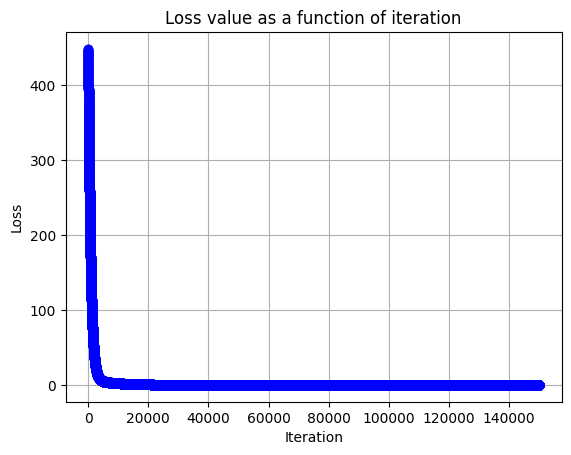

In [20]:
model = LinearRegression(training_features, training_labels.T , learning_rate=0.0001)
model.train(150000,True)

values = model.trainingLoss
x = np.arange(1, len(values) + 1)

# Plotting
plt.plot(x, values, marker='o', linestyle='-', color='blue')

# Labels and title
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss value as a function of iteration")
plt.grid(True)
plt.show()



#### Prediction Details

In [21]:
print("Predicted weights ", model.weight, " bias ", model.bias)

actual     = testing_labels            # full y-vector, shape (n_samples,)
predicted  = model.predict(testing_attributes)
loss       = model.calculateMseLoss(actual, predicted)

print("Prediction loss", model.calculateMseLoss(actual,model.predict(testing_attributes)))

Predicted weights  [[9.8279166 ]
 [3.22804313]]  bias  7.537647796399364
Prediction loss 0.0005741278495888987
